In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))

In [3]:
color = "#669999"
cmap_20 = "tab20_r"
figsize = (10,5)

In [4]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize, statistical_tests, visualize

# Read Data

In [5]:
df = pd.read_parquet("./../data/exemplars_secondary_literature.parquet")

In [6]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ...  \
ppn                                            ...   
1642067407              None             None  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
1678415065         Geneviève          Bollème  ...   
...                      ...              ...  ...   
448323834              Klaus  Meyer-Minnemann  ...   
448323834              Klaus  Meyer-Minnemann  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   
44832184X               None             None  ...   

                                           keyword_einzel_ppn  \
ppn                                                             
1642067407                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065                                               None   
1678415065      

In [7]:
df.columns.tolist()

['medium',
 'title',
 'title_supplement',
 'year',
 'entry_first',
 'author_first_name',
 'author_last_name',
 'author_gnd_id',
 'editor_first_name',
 'editor_last_name',
 'editor_gnd_id',
 'isbn',
 'ILNs',
 'content_type',
 'publisher',
 'language_text',
 'language_original',
 'pages',
 'format',
 'comment_isbn',
 'place_publication',
 'summary',
 'title_continuing_resource',
 'work_ppn',
 'work_info',
 'work_title',
 'expression_ppn',
 'expression_info',
 'expression_title',
 'DDC_notation',
 'DDC_sachgruppe',
 'DDC_grundnotation',
 'BK_ppn',
 'BK_notation',
 'BK_j',
 'RVK_ppn',
 'RVK_notation',
 'RVK_j',
 'RVK_k',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D',
 'keyword_LoC',
 'lcc_notation',
 'klassifikationssystem_system',
 'klassifikationssystem_notation',
 'uri_description',
 'uri',
 'GOK_ppn',
 'GOK_notation',
 'GOK_j',
 'signatur_place',
 'signatur',
 'signatur_date',
 'Abrufzeichen',
 'query',
 'year_publication',
 'literary_texts'

In [8]:
df.shape

(1041157, 77)

# Place of publications

In [9]:
round(df["place_publication"].notna().sum() / df.shape[0], 2)*100

99.0

In [10]:
#df["publisher"].str.replace(r"(?:de|ed|univ|verl|verlag|perss|ag)", r"", flags=re.I)
#df["publisher_mod"] = df["publisher_mod"].str.replace(r"\s\s+", r" ")


In [11]:
df.loc[df["place_publication"].fillna("") == "Main"]["place_publication"]

Series([], Name: place_publication, dtype: object)

In [12]:
df.loc[df["place_publication"].fillna("").str.contains("Frankfurt a\. M\.")]["place_publication"]

ppn
1133883036            Frankfurt a. M.
01252557X             Frankfurt a. M.
01252557X             Frankfurt a. M.
01252557X             Frankfurt a. M.
01252557X             Frankfurt a. M.
                       ...           
053377141             Frankfurt a. M.
288699173     Frankfurt a. M. {[u.a.]
288699173     Frankfurt a. M. {[u.a.]
288699173     Frankfurt a. M. {[u.a.]
288699173     Frankfurt a. M. {[u.a.]
Name: place_publication, Length: 995, dtype: object

In [13]:
df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt a\. M\.", r"Frankfurt am Main", flags=re.I)

In [14]:


df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt/Main", r"Frankfurt am Main", flags=re.I)

In [15]:

df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt \[Main\]", r"Frankfurt am Main", flags=re.I)
df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt, Main", r"Frankfurt am Main", flags=re.I)

df["place_publication"] = df["place_publication"].str.replace(r"Frankfurt[\s\W]*Main[\s\W]*]", r"Frankfurt am Main", flags=re.I)


In [16]:
df["place_publication"] = df["place_publication"].str.replace(r"erscheinungsort nicht ermittelbar", r"none", flags=re.I)



In [17]:
df.loc[df["place_publication"].fillna("").str.contains("Frankfurt a\. M\.")]["place_publication"]

Series([], Name: place_publication, dtype: object)

In [18]:
place_publication_df = tokenize.tokenize_column(df, "place_publication",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[\\w \']{3,}\\b', max_features = 200, add_name_of_original_column = False)


Shape of tokens:  (1041157, 200)
Shape of tokens after filtering:  (1041157, 200)


In [19]:
place_publication_df

paris  berlin  madrid  frankfurt am main  stuttgart  münchen  \
1642067407      1       0       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
...           ...     ...     ...                ...        ...      ...   
448323834       0       0       0                  1          0        0   
448323834       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   

            tübingen  barcelona  wien  new york  ...  napoca  edinburgh  \
1642067407         0          0     0         0  ...       0          0   
1678415065         0          0     0         0  ...       0          0   
1678415065         0          0     0         0  ...       0          0   
1678415065         0          0     0         0  ...       0          0   
1678415065         0          0     0         0  ...       0          0   
...              ...        ...   ...       ...  ...     ...        ...   
448323834          0          0     0         0  ...       0          0   
448323834          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   

            ostfildern  soveria mannelli  catania  novara  wrocław  ind  \
1642067407           0                 0        0       0        0    0   
1678415065           0                 0        0       0        0    0   
1678415065           0                 0        0       0        0    0   
1678415065           0                 0        0       0        0    0   
1678415065           0                 0        0       0        0    0   
...                ...               ...      ...     ...      ...  ...   
448323834            0                 0        0       0        0    0   
448323834            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   

            aldershot  manchester  
1642067407          0           0  
1678415065          0           0  
1678415065          0           0  
1678415065          0           0  
1678415065          0           0  
...               ...         ...  
448323834           0           0  
448323834           0           0  
44832184X           0           0  
44832184X           0           0  
44832184X           0           0  

[1041157 rows x 200 columns]

In [20]:
[column for column in place_publication_df.columns.tolist() if "frankfurt" in column]

['frankfurt am main', 'frankfurt', 'frankfurt a']

In [21]:
place_publication_df[[column for column in place_publication_df.columns.tolist() if "frankfurt" in column]].sum()

frankfurt am main    62837
frankfurt             6825
frankfurt a           1387
dtype: int64

In [22]:
place_publication_df["frankfurt am main"] = place_publication_df["frankfurt a"]  + place_publication_df["frankfurt am main"]  + place_publication_df["frankfurt"]

In [23]:
place_publication_df.drop("frankfurt a", axis=1, inplace=True)
place_publication_df.drop("frankfurt", axis=1, inplace=True)


In [24]:
place_publication_df.loc[place_publication_df["frankfurt am main"] > 0]

paris  berlin  madrid  frankfurt am main  stuttgart  münchen  \
1133883036      0       0       0                  1          0        0   
134354064X      0       0       0                  1          0        0   
1343539765      0       0       0                  1          0        0   
012559903       0       0       0                  1          0        0   
012559903       0       0       0                  1          0        0   
...           ...     ...     ...                ...        ...      ...   
448323834       0       0       0                  1          0        0   
448323834       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   

            tübingen  barcelona  wien  new york  ...  napoca  edinburgh  \
1133883036         0          0     0         0  ...       0          0   
134354064X         0          0     0         0  ...       0          0   
1343539765         0          0     0         0  ...       0          0   
012559903          0          0     0         0  ...       0          0   
012559903          0          0     0         0  ...       0          0   
...              ...        ...   ...       ...  ...     ...        ...   
448323834          0          0     0         0  ...       0          0   
448323834          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   
44832184X          0          0     0         0  ...       0          0   

            ostfildern  soveria mannelli  catania  novara  wrocław  ind  \
1133883036           0                 0        0       0        0    0   
134354064X           0                 0        0       0        0    0   
1343539765           0                 0        0       0        0    0   
012559903            0                 0        0       0        0    0   
012559903            0                 0        0       0        0    0   
...                ...               ...      ...     ...      ...  ...   
448323834            0                 0        0       0        0    0   
448323834            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   
44832184X            0                 0        0       0        0    0   

            aldershot  manchester  
1133883036          0           0  
134354064X          0           0  
1343539765          0           0  
012559903           0           0  
012559903           0           0  
...               ...         ...  
448323834           0           0  
448323834           0           0  
44832184X           0           0  
44832184X           0           0  
44832184X           0           0  

[69653 rows x 198 columns]

In [25]:
df.loc["054799740"]["place_publication"]

ppn
054799740    Frankfurt/M. [u.a.]
054799740    Frankfurt/M. [u.a.]
054799740    Frankfurt/M. [u.a.]
054799740    Frankfurt/M. [u.a.]
054799740    Frankfurt/M. [u.a.]
Name: place_publication, dtype: object

In [26]:
df.loc[df["place_publication"].fillna("").str.contains("Frankfurt")]["place_publication"].value_counts().head(20)

Frankfurt am Main                                                 22365
Madrid|Frankfurt am Main                                           6816
Frankfurt am Main [u.a.]                                           4895
Frankfurt am Main|Berlin|Bern|Wien [u.a.]                          4120
Frankfurt am Main {[u.a.]                                          4081
Frankfurt am Main|Madrid                                           1980
Bern|Berlin|Frankfurt am Main|Wien [u.a.]                          1333
Oxford|Bern|Berlin|Frankfurt am Main|Wien [u.a.]                    859
Frankfurt am Main|Berlin|Bern|New York|Paris|Wien                   837
Frankfurt am Main|Bern|Bruxelles|New York|Oxford|Warszawa|Wien      813
Frankfurt, M.                                                       752
Frankfurt am Main|Berlin|Bern|Bruxelles|New York|Oxford|Wien        717
Frankfurt am Main|Leipzig                                           631
Frankfurt am Main|Frankfurt am Main                             

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


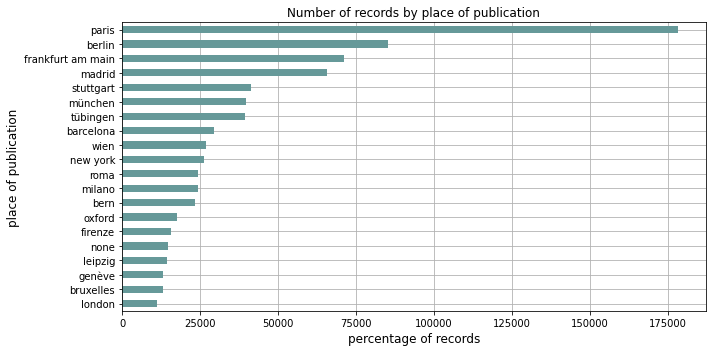

In [27]:
visualize.plot_bars(place_publication_df, head=20, percentage = False, title = "Number of records by place of publication", xlabel= "percentage of records", ylabel = "place of publication", figure_name = "bar_place_publication")        


In [28]:
place_publication_lt = place_publication_df.columns.tolist()
place_publication_lt

['paris',
 'berlin',
 'madrid',
 'frankfurt am main',
 'stuttgart',
 'münchen',
 'tübingen',
 'barcelona',
 'wien',
 'new york',
 'roma',
 'milano',
 'bern',
 'oxford',
 'firenze',
 'none',
 'leipzig',
 'genève',
 'bruxelles',
 'london',
 'heidelberg',
 'boston',
 'amsterdam',
 'hamburg',
 'lisboa',
 'torino',
 'bologna',
 'méxico',
 'zürich',
 'cambridge',
 'bonn',
 'pisa',
 'ismaning',
 'köln',
 'buenos aires',
 'bielefeld',
 'napoli',
 'würzburg',
 'düsseldorf',
 'münster',
 'wiesbaden',
 'reinbek bei hamburg',
 'kassel',
 'darmstadt',
 'paderborn',
 'montréal',
 'são paulo',
 'saint',
 'göttingen',
 'québec',
 'bucureşti',
 'weimar',
 'rennes',
 'sevilla',
 'salamanca',
 'vienna',
 'hildesheim',
 'vigo',
 'ravenna',
 'baden',
 'venezia',
 'padova',
 'basel',
 'toronto',
 'palermo',
 'lyon',
 'rio de janeiro',
 'lausanne',
 'wilhelmsfeld',
 'toulouse',
 'pamplona',
 'valencia',
 'grenoble',
 'louvain',
 'aix',
 'provence',
 'freiburg',
 'alessandria',
 'calif',
 'baltimore',
 'warsz

In [29]:
df = pd.concat([df, place_publication_df], axis=1)

In [30]:
", ".join(place_publication_lt)


"paris, berlin, madrid, frankfurt am main, stuttgart, münchen, tübingen, barcelona, wien, new york, roma, milano, bern, oxford, firenze, none, leipzig, genève, bruxelles, london, heidelberg, boston, amsterdam, hamburg, lisboa, torino, bologna, méxico, zürich, cambridge, bonn, pisa, ismaning, köln, buenos aires, bielefeld, napoli, würzburg, düsseldorf, münster, wiesbaden, reinbek bei hamburg, kassel, darmstadt, paderborn, montréal, são paulo, saint, göttingen, québec, bucureşti, weimar, rennes, sevilla, salamanca, vienna, hildesheim, vigo, ravenna, baden, venezia, padova, basel, toronto, palermo, lyon, rio de janeiro, lausanne, wilhelmsfeld, toulouse, pamplona, valencia, grenoble, louvain, aix, provence, freiburg, alessandria, calif, baltimore, warszawa, granada, mass, washington, santiago de compostela, leiden, lille, caen, philadelphia, villeneuve d'ascq, caracas, conn, porto, dresden, marburg, lima, valladolid, perugia, mannheim, bari, zaragoza, neuve, bogotá, new haven, bamberg, str

In [31]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ... napoca edinburgh  \
ppn                                            ...                    
1642067407              None             None  ...      0         0   
1678415065         Geneviève          Bollème  ...      0         0   
1678415065         Geneviève          Bollème  ...      0         0   
1678415065         Geneviève          Bollème  ...      0         0   
1678415065         Geneviève          Bollème  ...      0         0   
...                      ...              ...  ...    ...       ...   
448323834              Klaus  Meyer-Minnemann  ...      0         0   
448323834              Klaus  Meyer-Minnemann  ...      0         0   
44832184X               None             None  ...      0         0   
44832184X               None             None  ...      0         0   
44832184X               None             None  ...      0         0   

           ostfildern soveria mannelli catania novara wrocław ind aldershot  \
ppn                                                                           
1642067407          0      

# Create table for Geobrowser

In [25]:
place_publication_df

paris  berlin  madrid  frankfurt am main  stuttgart  münchen  \
1642067407      1       0       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
1678415065      0       1       0                  0          0        0   
...           ...     ...     ...                ...        ...      ...   
448323834       0       0       0                  1          0        0   
448323834       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   
44832184X       0       0       0                  1          0        0   

            tübingen  barcelona  wien  new york  ...  españa  braunschweig  \
1642067407         0          0     0         0  ...       0             0   
1678415065         0          0     0         0  ...       0             0   
1678415065         0          0     0         0  ...       0             0   
1678415065         0          0     0         0  ...       0             0   
1678415065         0          0     0         0  ...       0             0   
...              ...        ...   ...       ...  ...     ...           ...   
448323834          0          0     0         0  ...       0             0   
448323834          0          0     0         0  ...       0             0   
44832184X          0          0     0         0  ...       0             0   
44832184X          0          0     0         0  ...       0             0   
44832184X          0          0     0         0  ...       0             0   

            napoca  edinburgh  ostfildern  soveria mannelli  catania  novara  \
1642067407       0          0           0                 0        0       0   
1678415065       0          0           0                 0        0       0   
1678415065       0          0           0                 0        0       0   
1678415065       0          0           0                 0        0       0   
1678415065       0          0           0                 0        0       0   
...            ...        ...         ...               ...      ...     ...   
448323834        0          0           0                 0        0       0   
448323834        0          0           0                 0        0       0   
44832184X        0          0           0                 0        0       0   
44832184X        0          0           0                 0        0       0   
44832184X        0          0           0                 0        0       0   

            wrocław  ind  
1642067407        0    0  
1678415065        0    0  
1678415065        0    0  
1678415065        0    0  
1678415065        0    0  
...             ...  ...  
448323834         0    0  
448323834         0    0  
44832184X         0    0  
44832184X         0    0  
44832184X         0    0  

[1041404 rows x 200 columns]

In [26]:
df["year_publication"]

ppn
1642067407    1987
1678415065    2019
1678415065    2019
1678415065    2019
1678415065    2019
              ... 
448323834     1987
448323834     1987
44832184X     1982
44832184X     1982
44832184X     1982
Name: year_publication, Length: 1041404, dtype: int32

In [27]:
[column for column in df.columns.tolist() if "year" in column]

['year', 'year_publication']

In [28]:
df["place_extracted"] = place_publication_df.idxmax(axis=1)

In [29]:
df

medium                                              title  \
ppn                                                                    
1642067407    Aau                                              Camus   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
1678415065    Oau   Livre et société dans la France du XVIIIe siècle   
...           ...                                                ...   
448323834     Oax                          Avantgarde und Revolution   
448323834     Oax                          Avantgarde und Revolution   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   
44832184X     Oax  Die @Frau im spanischen Roman nach dem Bürgerk...   

                                             title_supplement  year  \
ppn                                                                   
1642067407                                               None  1987   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
1678415065                                                [1]  2019   
...                                                       ...   ...   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
448323834   Mexikanische Lyrik von López Velarde bis Octav...  1987   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   
44832184X   Camilo José Cela, Carmen Laforet, Ana María Ma...  1982   

                entry_first author_first_name author_last_name author_gnd_id  \
ppn                                                                            
1642067407  HDBSRO:13-09-18            Morvan         Lebesque     077112679   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
1678415065     EBP:08-10-19              None             None          None   
...                     ...               ...              ...           ...   
448323834     6055:07-05-19              None             None          None   
448323834     6055:07-05-19              None             None          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   
44832184X     6055:07-05-19            Sylvia            Truxa          None   

           editor_first_name editor_last_name  ... braunschweig napoca  \
ppn                                            ...                       
1642067407              None             None  ...            0      0   
1678415065         Geneviève          Bollème  ...            0      0   
1678415065         Geneviève          Bollème  ...            0      0   
1678415065         Geneviève          Bollème  ...            0      0   
1678415065         Geneviève          Bollème  ...            0      0   
...                      ...              ...  ...          ...    ...   
448323834              Klaus  Meyer-Minnemann  ...            0      0   
448323834              Klaus  Meyer-Minnemann  ...            0      0   
44832184X               None             None  ...            0      0   
44832184X               None             None  ...            0      0   
44832184X               None             None  ...            0      0   

           edinburgh ostfildern soveria mannelli catania novara wrocław ind  \
ppn                                                                

In [30]:
from geopy.geocoders import Nominatim

In [32]:
sample_5000_df = df[["medium","title","year_publication","place_extracted"]].sample(5000,random_state=2022)

In [34]:
len(sample_5000_df.place_extracted.unique())

183

In [37]:
unique_places_df = pd.DataFrame(sample_5000_df.place_extracted.unique(), columns = ["place_name"])

In [39]:
geolocator = Nominatim(user_agent = "#")
geolocator.geocode("london")

Location(London, Greater London, England, SW1A 2DX, United Kingdom, (51.5073219, -0.1276474, 0.0))

In [44]:
geolocator.geocode("london")[1]

(51.5073219, -0.1276474)

In [53]:
for index, row in unique_places_df.loc[unique_places_df["extracted_name"].isna()].iterrows():
    print(row["place_name"])
    try:
        geolocator = Nominatim(user_agent = "eumanismo@gmail.com")
        response = geolocator.geocode(row["place_name"])

        unique_places_df.loc[index, "extracted_name"] = response[0]
        unique_places_df.loc[index, "extracted_latitude"] = response[1][0]
        unique_places_df.loc[index, "extracted_longitude"] = response[1][1]
    except:
        print("error")



erscheinungsort nicht ermittelbar
error
alcalá de henares
helsinki
mass
fasano
ottawa
trier
philadelphia
toronto
dijon
québec
bogotá
lima
dresden
nancy
napoli
clermont
iaşi
seelze
durham
mannheim
freiburg
la habana
córdoba
chicago
perugia
genova
porto
boston
basingstoke
soveria mannelli
mainz
hannover
turnhout
rheinfelden
chapel hill
lewisburg
san francisco
berkeley
liverpool
basel
ithaca
freiburg i
lecce
hildesheim
a coruña
frankfurt a
main
edinburgh
aix
braunschweig
wilhelmsfeld
kiel
mexico
limoges
warszawa
fiesole


In [54]:
unique_places_df

place_name                                     extracted_name  \
0       london  London, Greater London, England, SW1A 2DX, Uni...   
1       madrid  Madrid, Área metropolitana de Madrid y Corredo...   
2        paris  Paris, Île-de-France, France métropolitaine, F...   
3    frankfurt             Frankfurt am Main, Hessen, Deutschland   
4     montréal  Montréal, Agglomération de Montréal, Montréal ...   
..         ...                                                ...   
178       kiel              Kiel, Schleswig-Holstein, Deutschland   
179     mexico                                             México   
180    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
181   warszawa          Warszawa, województwo mazowieckie, Polska   
182    fiesole                  Fiesole, Firenze, Toscana, Italia   

     extracted_latitude  extracted_longitude  
0             51.507322            -0.127647  
1             40.416705            -3.703582  
2             48.858890             2.320041  
3             50.110644             8.682092  
4             45.503182           -73.569806  
..                  ...                  ...  
178           54.322708            10.135555  
179           23.658512          -102.007710  
180           45.835424             1.264485  
181           52.231958            21.006725  
182           43.806669            11.293074  

[183 rows x 4 columns]

In [55]:
sample_5000_df

medium                                              title  \
ppn                                                                    
625809211     Bau                                     Open your eyes   
023750618    Aauc      La @realidad en la novelística de Manuel Puig   
528952722     Aau        Memoria literaria de la Transición española   
219104883     Aau                    Dictionnaire de l'Ancien Régime   
516536974     Adv                   Aisthesis, Hermeneutik, Rhetorik   
...           ...                                                ...   
1637797486    Aau                                   Odas elementales   
1621583090    Aau                                       Pablo Neruda   
1098730011    Aau                    Pesquisas en lingüística andina   
482757507     Aau  Die @literarische Übersetzung zwischen Theorie...   
626477174     Aau                         Die @Legende als Kunstform   

            year_publication place_extracted  
ppn                                           
625809211               2007          london  
023750618               1990          madrid  
528952722               2007          madrid  
219104883               1996           paris  
516536974               2006       frankfurt  
...                      ...             ...  
1637797486              1994          madrid  
1621583090              2009         münchen  
1098730011              1988            lima  
482757507               2005          berlin  
626477174               2010         münchen  

[5000 rows x 4 columns]

In [58]:
sample_5000_df = pd.merge(sample_5000_df, unique_places_df, left_on="place_extracted",  right_on = "place_name")

In [59]:
sample_5000_df

medium                                             title  \
0       Bau                                    Open your eyes   
1       Abv                                Portuguese studies   
2       Aau                          Dario Fo and Franca Rame   
3       Aau                           Experiments with empire   
4       Aau                         The @misfit of the family   
...     ...                                               ...   
4995    Aau              Dictionnaire national et anecdotique   
4996    Aau  Problèmes de l'écriture populaire au XIXe siècle   
4997    Aau                         Les @fils de Monte-Cristo   
4998    Aau                       Włochy w czasach romantyzmu   
4999    Aau                                   Enrico Palandri   

      year_publication place_extracted place_name  \
0                 2007          london     london   
1                 1985          london     london   
2                 2001          london     london   
3                 2019          london     london   
4                 2003          london     london   
...                ...             ...        ...   
4995              2008         limoges    limoges   
4996              1997         limoges    limoges   
4997              2002         limoges    limoges   
4998              2004        warszawa   warszawa   
4999              2010         fiesole    fiesole   

                                         extracted_name  extracted_latitude  \
0     London, Greater London, England, SW1A 2DX, Uni...           51.507322   
1     London, Greater London, England, SW1A 2DX, Uni...           51.507322   
2     London, Greater London, England, SW1A 2DX, Uni...           51.507322   
3     London, Greater London, England, SW1A 2DX, Uni...           51.507322   
4     London, Greater London, England, SW1A 2DX, Uni...           51.507322   
...                                                 ...                 ...   
4995  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...           45.835424   
4996  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...           45.835424   
4997  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...           45.835424   
4998          Warszawa, województwo mazowieckie, Polska           52.231958   
4999                  Fiesole, Firenze, Toscana, Italia           43.806669   

      extracted_longitude  
0               -0.127647  
1               -0.127647  
2               -0.127647  
3               -0.127647  
4               -0.127647  
...                   ...  
4995             1.264485  
4996             1.264485  
4997             1.264485  
4998            21.006725  
4999            11.293074  

[5000 rows x 8 columns]

In [64]:
sample_5000_df.drop(columns = ["Address"], inplace=True)

In [66]:
sample_5000_df.rename(columns= {"place_extracted": "Address","year_publication" : "TimeStamp", "extracted_latitude": "Latitude", "extracted_longitude": "Longitude"  }, inplace=True)


In [68]:
sample_5000_df["TimeSpan:begin"] = ""
sample_5000_df["TimeSpan:end"] = ""
sample_5000_df["GettyID"] = ""


In [67]:
sample_5000_df

medium                                             title  TimeStamp  \
0       Bau                                    Open your eyes       2007   
1       Abv                                Portuguese studies       1985   
2       Aau                          Dario Fo and Franca Rame       2001   
3       Aau                           Experiments with empire       2019   
4       Aau                         The @misfit of the family       2003   
...     ...                                               ...        ...   
4995    Aau              Dictionnaire national et anecdotique       2008   
4996    Aau  Problèmes de l'écriture populaire au XIXe siècle       1997   
4997    Aau                         Les @fils de Monte-Cristo       2002   
4998    Aau                       Włochy w czasach romantyzmu       2004   
4999    Aau                                   Enrico Palandri       2010   

       Address place_name                                     extracted_name  \
0       london     london  London, Greater London, England, SW1A 2DX, Uni...   
1       london     london  London, Greater London, England, SW1A 2DX, Uni...   
2       london     london  London, Greater London, England, SW1A 2DX, Uni...   
3       london     london  London, Greater London, England, SW1A 2DX, Uni...   
4       london     london  London, Greater London, England, SW1A 2DX, Uni...   
...        ...        ...                                                ...   
4995   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4996   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4997   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4998  warszawa   warszawa          Warszawa, województwo mazowieckie, Polska   
4999   fiesole    fiesole                  Fiesole, Firenze, Toscana, Italia   

       Latitude  Longitude  
0     51.507322  -0.127647  
1     51.507322  -0.127647  
2     51.507322  -0.127647  
3     51.507322  -0.127647  
4     51.507322  -0.127647  
...         ...        ...  
4995  45.835424   1.264485  
4996  45.835424   1.264485  
4997  45.835424   1.264485  
4998  52.231958  21.006725  
4999  43.806669  11.293074  

[5000 rows x 8 columns]

In [71]:
sample_5000_df = sample_5000_df.loc[sample_5000_df["extracted_name"].notna()]

In [72]:
sample_5000_df

medium                                             title  TimeStamp  \
0       Bau                                    Open your eyes       2007   
1       Abv                                Portuguese studies       1985   
2       Aau                          Dario Fo and Franca Rame       2001   
3       Aau                           Experiments with empire       2019   
4       Aau                         The @misfit of the family       2003   
...     ...                                               ...        ...   
4995    Aau              Dictionnaire national et anecdotique       2008   
4996    Aau  Problèmes de l'écriture populaire au XIXe siècle       1997   
4997    Aau                         Les @fils de Monte-Cristo       2002   
4998    Aau                       Włochy w czasach romantyzmu       2004   
4999    Aau                                   Enrico Palandri       2010   

       Address place_name                                     extracted_name  \
0       london     london  London, Greater London, England, SW1A 2DX, Uni...   
1       london     london  London, Greater London, England, SW1A 2DX, Uni...   
2       london     london  London, Greater London, England, SW1A 2DX, Uni...   
3       london     london  London, Greater London, England, SW1A 2DX, Uni...   
4       london     london  London, Greater London, England, SW1A 2DX, Uni...   
...        ...        ...                                                ...   
4995   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4996   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4997   limoges    limoges  Limoges, Haute-Vienne, Nouvelle-Aquitaine, Fra...   
4998  warszawa   warszawa          Warszawa, województwo mazowieckie, Polska   
4999   fiesole    fiesole                  Fiesole, Firenze, Toscana, Italia   

       Latitude  Longitude TimeSpan:begin TimeSpan:end GettyID  
0     51.507322  -0.127647                                      
1     51.507322  -0.127647                                      
2     51.507322  -0.127647                                      
3     51.507322  -0.127647                                      
4     51.507322  -0.127647                                      
...         ...        ...            ...          ...     ...  
4995  45.835424   1.264485                                      
4996  45.835424   1.264485                                      
4997  45.835424   1.264485                                      
4998  52.231958  21.006725                                      
4999  43.806669  11.293074                                      

[4990 rows x 11 columns]

In [65]:
df[["medium","title","year_publication","place_extracted"]].to_csv("./../data/geodata.tsv",sep="\t")

In [75]:
sample_5000_df.to_csv("./../data/geodata_5000.csv")

In [76]:
sample_5000_df.sample(1000).to_csv("./../data/geodata_1000.csv")

# Chronological Development

In [32]:
for place in place_publication_lt:
    if place not in df.columns.tolist():
        print(place)

In [33]:
years_place_publication_df = df.groupby(["year_publication"]).sum()[place_publication_lt]

In [34]:
years_place_publication_df

paris  berlin  madrid  frankfurt am main  stuttgart  \
year_publication                                                        
1980               3785     524    1017                929        327   
1981               3374     506    1082                995        296   
1982               3508     463    1162                896        317   
1983               3844     664    1104                898        477   
1984               4075     690    1156               1132        481   
1985               4497     879    1212               1141        472   
1986               5125     666    1396               1070        496   
1987               4548     917    1613               1222        677   
1988               5363     882    1915               1699        581   
1989               5716    1257    1716               1434        794   
1990               5574    1104    2389               1671        790   
1991               6340     960    1906               1850        825   
1992               6098    1321    2100               1883        955   
1993               6359    1516    1539               1874        933   
1994               6491    1602    1922               1898       1115   
1995               6382    1714    1895               1998        865   
1996               6039    1518    1918               2008        842   
1997               6176    1789    1551               1809        952   
1998               6267    1914    1672               1949       1174   
1999               6319    2335    2044               2390       1051   
2000               4704    2448    1954               2496       1195   
2001               5428    2343    1942               2224       1409   
2002               4627    2157    1967               1965       1064   
2003               4617    2375    2071               1874       1060   
2004               4065    2291    1776               2419        924   
2005               4396    2147    1993               2050       1486   
2006               4161    2358    1943               2431       1800   
2007               4104    2492    1984               2442       2153   
2008               3674    2696    2008               2080       1587   
2009               3261    2609    1949               2299       1649   
2010               3643    3655    1844               2212       1599   
2011               3214    6815    1644               2271       1095   
2012               3293    5902    1320               2017       1281   
2013               3292    3308    1263               2006       1433   
2014               3349    3368    1209               1692       1798   
2015               3124    3228    1219               1696       1276   
2016               2696    3144    1363               1744       1169   
2017               2580    2773    1353               1971       1344   
2018               2021    2865    1608               1491        870   
2019               2119    2969    1026                923        859   

                  münchen  tübingen  barcelona  wien  new york  ...  napoca  \
year_publication                                                ...           
1980                  782       616        637   167       154  ...       7   
1981                  567       621        619    89        89  ...       8   
1982                  569       497        576    54       140  ...       7   
1983                  607       493        651    95       154  ...       7   
1984                  890       735        647   176       255  ...       3   
1985                  903       588        717   160       259  ...       8   
1986                 1209       811        759   128       333  ...       0   
1987                 1199       765        810   178       369  ...      13   
1988                  988       961        898   207       467  ...       0   
1989                  780       894        916   237       506  ...       5   
199

In [35]:
years_place_publication_rel_df = years_place_publication_df.loc[:].div(years_place_publication_df.sum(axis='columns'), axis="index")*100

In [36]:
years_place_publication_rel_df.round(0)

paris  berlin  madrid  frankfurt am main  stuttgart  \
year_publication                                                        
1980               23.0     3.0     6.0                6.0        2.0   
1981               21.0     3.0     7.0                6.0        2.0   
1982               22.0     3.0     7.0                6.0        2.0   
1983               22.0     4.0     6.0                5.0        3.0   
1984               21.0     4.0     6.0                6.0        2.0   
1985               23.0     4.0     6.0                6.0        2.0   
1986               23.0     3.0     6.0                5.0        2.0   
1987               21.0     4.0     7.0                6.0        3.0   
1988               21.0     4.0     8.0                7.0        2.0   
1989               22.0     5.0     7.0                6.0        3.0   
1990               20.0     4.0     8.0                6.0        3.0   
1991               22.0     3.0     6.0                6.0        3.0   
1992               21.0     4.0     7.0                6.0        3.0   
1993               21.0     5.0     5.0                6.0        3.0   
1994               20.0     5.0     6.0                6.0        3.0   
1995               20.0     5.0     6.0                6.0        3.0   
1996               19.0     5.0     6.0                6.0        3.0   
1997               19.0     6.0     5.0                6.0        3.0   
1998               19.0     6.0     5.0                6.0        3.0   
1999               18.0     7.0     6.0                7.0        3.0   
2000               13.0     7.0     5.0                7.0        3.0   
2001               16.0     7.0     6.0                6.0        4.0   
2002               14.0     7.0     6.0                6.0        3.0   
2003               15.0     7.0     7.0                6.0        3.0   
2004               13.0     7.0     6.0                8.0        3.0   
2005               13.0     6.0     6.0                6.0        4.0   
2006               12.0     7.0     6.0                7.0        5.0   
2007               11.0     7.0     6.0                7.0        6.0   
2008               11.0     8.0     6.0                6.0        5.0   
2009               11.0     9.0     6.0                8.0        5.0   
2010               12.0    12.0     6.0                7.0        5.0   
2011               10.0    21.0     5.0                7.0        3.0   
2012               11.0    19.0     4.0                7.0        4.0   
2013               12.0    12.0     5.0                7.0        5.0   
2014               12.0    12.0     4.0                6.0        7.0   
2015               11.0    12.0     4.0                6.0        5.0   
2016                9.0    11.0     5.0                6.0        4.0   
2017               10.0    11.0     5.0                8.0        5.0   
2018                8.0    12.0     7.0                6.0        4.0   
2019               10.0    14.0     5.0                4.0        4.0   

                  münchen  tübingen  barcelona  wien  new york  ...  napoca  \
year_publication                                                ...           
1980                  5.0       4.0        4.0   1.0       1.0  ...     0.0   
1981                  4.0       4.0        4.0   1.0       1.0  ...     0.0   
1982                  4.0       3.0        4.0   0.0       1.0  ...     0.0   
1983                  3.0       3.0        4.0   1.0       1.0  ...     0.0   
1984                  5.0       4.0        3.0   1.0       1.0  ...     0.0   
1985                  5.0       3.0        4.0   1.0       1.0  ...     0.0   
1986                  6.0       4.0        3.0   1.0       2.0  ...     0.0   
1987                  5.0       3.0        4.0   1.0       2.0  ...     0.0   
1988                  4.0       4.0        4.0   1.0       2.0  ...     0.0   
1989                  3.0       3.0        4.0   1.0       2.0  ...     0.0   
199

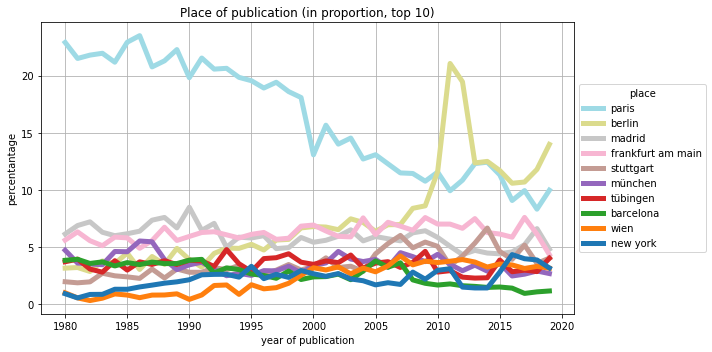

In [37]:
visualize.plot_lines(years_place_publication_rel_df.iloc[:,0:10], title = "Place of publication (in proportion, top 10)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "figure_07_plot_lines_place_10", title_legend = "place")


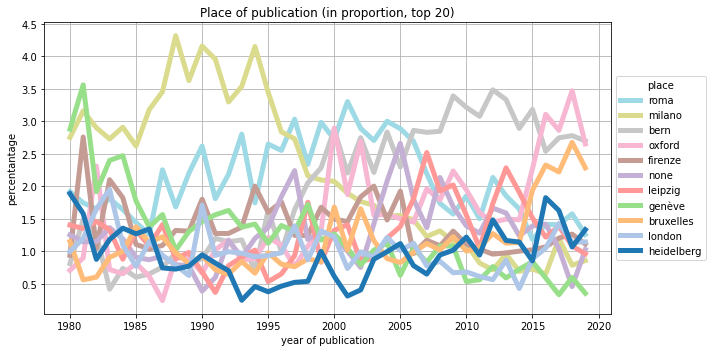

In [38]:
visualize.plot_lines(years_place_publication_rel_df.iloc[:,10:21], title = "Place of publication (in proportion, top 20)", cmap = cmap_20, xlabel = "year of publication", ylabel = "percentantage", figure_name = "plot_lines_place_20", title_legend = "place")


C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


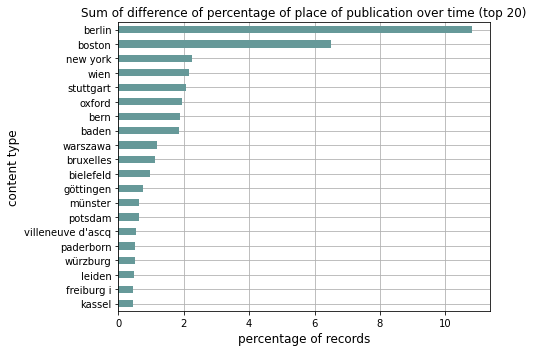

In [39]:
visualize.plot_bars(years_place_publication_rel_df.diff(), figsize = (7,5), head = 20, percentage = False, title = "Sum of difference of percentage of place of publication over time (top 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")


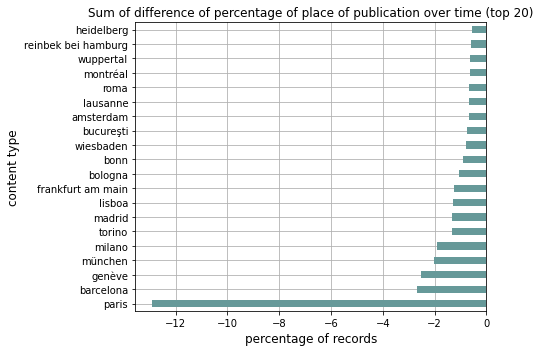

In [40]:
visualize.plot_bars(years_place_publication_rel_df.diff(), figsize = (7,5), tail = 20, percentage = False, title = "Sum of difference of percentage of place of publication over time (top 20)", xlabel= "percentage of records", ylabel = "content type", figure_name = "bar_diff_publishers_head")


In [41]:
years_place_publication_rel_df

paris     berlin    madrid  frankfurt am main  \
year_publication                                                      
1980              22.894992   3.169610  6.151706           5.619405   
1981              21.494553   3.223546  6.893037           6.338791   
1982              21.787467   2.875598  7.216943           5.564872   
1983              21.948156   3.791253  6.303529           5.127327   
1984              21.167732   3.584229  6.004883           5.880214   
1985              22.915817   4.479209  6.176111           5.814309   
1986              23.488703   3.052386  6.398093           4.903983   
1987              20.755750   4.184922  7.361263           5.576853   
1988              21.287659   3.500972  7.601318           6.743937   
1989              22.269841   4.897339  6.685627           5.586940   
1990              19.812327   3.924078  8.491505           5.939433   
1991              21.532400   3.260427  6.473305           6.283114   
1992              20.563836   4.454711  7.081675           6.349902   
1993              20.633376   4.919043  4.993673           6.080665   
1994              19.842265   4.897136  5.875340           5.801975   
1995              19.550300   5.250582  5.805048           6.120573   
1996              18.910879   4.753554  6.006138           6.287969   
1997              19.414668   5.623841  4.875672           5.686712   
1998              18.598647   5.680199  4.962013           5.784069   
1999              18.080114   6.680973  5.848355           6.838340   
2000              13.072840   6.803213  5.430342           6.936609   
2001              15.661608   6.760344  5.603324           6.416989   
2002              14.007629   6.530031  5.954832           5.948777   
2003              14.538069   7.478431  6.521192           5.900875   
2004              12.706302   7.161165  5.551388           7.561265   
2005              13.081776   6.389120  5.930842           6.100464   
2006              12.284120   6.961297  5.736132           7.176807   
2007              11.490648   6.977265  5.554933           6.837272   
2008              11.442631   8.396661  6.253893           6.478136   
2009              10.766285   8.613688  6.434679           7.590214   
2010              11.561409  11.599492  5.852110           7.019994   
2011               9.931708  21.059300  5.080189           7.017706   
2012              10.856879  19.458640  4.351983           6.649962   
2013              12.305622  12.365431  4.721142           7.498505   
2014              12.428100  12.498608  4.486585           6.278992   
2015              11.327870  11.704982  4.420190           6.149830   
2016               9.079581  10.588354  4.590307           5.873438   
2017               9.949865  10.694177  5.217894           7.601234   
2018               8.322009  11.797406  6.621371           6.139592   
2019               9.980219  13.983610  4.832329           4.347212   

                  stuttgart   münchen  tübingen  barcelona      wien  \
year_publication                                                       
1980               1.977982  4.730220  3.726107   3.853133  1.010162   
1981               1.885711  3.612155  3.956170   3.943429  0.566987   
1982               1.968822  3.533942  3.086765   3.577418  0.335383   
1983               2.723535  3.465799  2.814891   3.717026  0.542423   
1984               2.498572  4.623136  3.817983   3.360864  0.914238   
1985               2.405218  4.601508  2.996331   3.653689  0.815328   
1986               2.273248  5.541042  3.716944   3.478620  0.586645   
1987               3.089631  5.471888  3.491238   3.696605  0.812340   
1988               2.306196  3.921724  3.814552   3.564482  0.821657   
1989               3.093466  3.038922  3.483072   3.568785  0.923365   
1990               2.807990  3.454894  3.860098   3.863653  0.437193   
1991               2.801929  3.684961  3.793642   3.936286  0.821899   
1992               3.220476  3.

In [42]:
years_place_publication_rel_df.shape

(40, 198)

In [43]:
years_place_publication_rel_df.dropna(how="all")

paris     berlin    madrid  frankfurt am main  \
year_publication                                                      
1980              22.894992   3.169610  6.151706           5.619405   
1981              21.494553   3.223546  6.893037           6.338791   
1982              21.787467   2.875598  7.216943           5.564872   
1983              21.948156   3.791253  6.303529           5.127327   
1984              21.167732   3.584229  6.004883           5.880214   
1985              22.915817   4.479209  6.176111           5.814309   
1986              23.488703   3.052386  6.398093           4.903983   
1987              20.755750   4.184922  7.361263           5.576853   
1988              21.287659   3.500972  7.601318           6.743937   
1989              22.269841   4.897339  6.685627           5.586940   
1990              19.812327   3.924078  8.491505           5.939433   
1991              21.532400   3.260427  6.473305           6.283114   
1992              20.563836   4.454711  7.081675           6.349902   
1993              20.633376   4.919043  4.993673           6.080665   
1994              19.842265   4.897136  5.875340           5.801975   
1995              19.550300   5.250582  5.805048           6.120573   
1996              18.910879   4.753554  6.006138           6.287969   
1997              19.414668   5.623841  4.875672           5.686712   
1998              18.598647   5.680199  4.962013           5.784069   
1999              18.080114   6.680973  5.848355           6.838340   
2000              13.072840   6.803213  5.430342           6.936609   
2001              15.661608   6.760344  5.603324           6.416989   
2002              14.007629   6.530031  5.954832           5.948777   
2003              14.538069   7.478431  6.521192           5.900875   
2004              12.706302   7.161165  5.551388           7.561265   
2005              13.081776   6.389120  5.930842           6.100464   
2006              12.284120   6.961297  5.736132           7.176807   
2007              11.490648   6.977265  5.554933           6.837272   
2008              11.442631   8.396661  6.253893           6.478136   
2009              10.766285   8.613688  6.434679           7.590214   
2010              11.561409  11.599492  5.852110           7.019994   
2011               9.931708  21.059300  5.080189           7.017706   
2012              10.856879  19.458640  4.351983           6.649962   
2013              12.305622  12.365431  4.721142           7.498505   
2014              12.428100  12.498608  4.486585           6.278992   
2015              11.327870  11.704982  4.420190           6.149830   
2016               9.079581  10.588354  4.590307           5.873438   
2017               9.949865  10.694177  5.217894           7.601234   
2018               8.322009  11.797406  6.621371           6.139592   
2019               9.980219  13.983610  4.832329           4.347212   

                  stuttgart   münchen  tübingen  barcelona      wien  \
year_publication                                                       
1980               1.977982  4.730220  3.726107   3.853133  1.010162   
1981               1.885711  3.612155  3.956170   3.943429  0.566987   
1982               1.968822  3.533942  3.086765   3.577418  0.335383   
1983               2.723535  3.465799  2.814891   3.717026  0.542423   
1984               2.498572  4.623136  3.817983   3.360864  0.914238   
1985               2.405218  4.601508  2.996331   3.653689  0.815328   
1986               2.273248  5.541042  3.716944   3.478620  0.586645   
1987               3.089631  5.471888  3.491238   3.696605  0.812340   
1988               2.306196  3.921724  3.814552   3.564482  0.821657   
1989               3.093466  3.038922  3.483072   3.568785  0.923365   
1990               2.807990  3.454894  3.860098   3.863653  0.437193   
1991               2.801929  3.684961  3.793642   3.936286  0.821899   
1992               3.220476  3.

In [44]:
#years_place_publication_rel_df.drop("none", axis="columns", inplace=True)
#years_place_publication_rel_df.drop("rennes", axis="columns", inplace=True)


In [45]:
years_place_publication_rel_df.iloc[:,20:30]

heidelberg    boston  amsterdam   hamburg    lisboa  \
year_publication                                                        
1980                1.887249  0.217759   0.828696  0.447617  1.748125   
1981                1.579920  0.197490   1.019303  0.630694  1.465248   
1982                0.875722  0.260853   0.465810  1.167629  1.956400   
1983                1.181912  0.359712   0.570972  1.090556  2.689277   
1984                1.355774  0.405174   1.012934  0.768791  1.672640   
1985                1.268854  0.616592   0.723604  1.268854  1.019160   
1986                1.342866  0.233741   0.884550  1.361199  0.719556   
1987                0.743885  0.209931   0.556773  0.616101  0.976634   
1988                0.726392  0.313579   0.714484  0.849442  0.702576   
1989                0.771419  0.311684   0.448046  0.568824  1.289594   
1990                0.945475  0.138622   0.824625  0.561598  0.824625   
1991                0.818503  0.125662   0.699633  1.473985  0.933976   
1992                0.701423  0.074189   0.893640  0.809334  1.095974   
1993                0.246601  0.032448   0.665174  1.054544  0.720335   
1994                0.458533  0.058081   1.134106  0.840644  0.868156   
1995                0.376792  0.027570   0.894498  1.069109  0.805661   
1996                0.463456  0.003131   0.955095  0.779733  0.588714   
1997                0.521832  0.025149   0.968219  0.625570  0.943070   
1998                0.537156  0.133547   1.020893  0.925926  0.747863   
1999                0.998569  0.263233   0.835479  0.969957  0.792561   
2000                0.614179  0.264014   1.042159  0.558597  0.669761   
2001                0.311616  0.095216   0.735761  0.568411  0.833862   
2002                0.405667  0.090821   0.950593  0.926374  0.977840   
2003                0.878519  0.119655   0.872221  0.717929  0.758864   
2004                0.993998  0.400100   1.347212  0.615779  0.750188   
2005                1.118914  0.142840   1.214141  0.821331  0.630877   
2006                0.779382  0.309981   0.938801  0.720338  0.578632   
2007                0.649569  0.366782   1.276739  1.117146  0.548774   
2008                0.943690  0.239816   1.177277  0.968606  0.878286   
2009                1.016871  0.168378   1.333818  0.729638  0.653703   
2010                1.218661  0.269756   1.101238  0.879086  0.409394   
2011                0.942493  0.608757   0.886870  1.090819  0.395538   
2012                1.483631  0.204411   1.061620  0.827536  0.306617   
2013                1.166268  1.136364   0.781250  0.773774  0.437350   
2014                1.142984  2.538316   0.920325  0.820128  0.478717   
2015                0.852129  3.408514   0.533034  0.855755  0.471390   
2016                1.825346  6.085609   0.599468  1.030546  0.471492   
2017                1.627459  5.996915   0.296953  0.555341  0.358658   
2018                1.066502  4.826024   0.560016  0.893556  0.424130   
2019                1.332894  6.735117   0.136586  0.489827  0.442728   

                    torino   bologna    méxico    zürich  cambridge  
year_publication                                                     
1980              1.512219  1.481974  0.580692  0.695621   0.375030  
1981              1.446136  1.216793  0.745365  0.707141   0.426833  
1982              1.416061  0.931619  0.664555  0.602447   0.881933  
1983              1.210460  0.873587  0.839329  0.542423   0.696586  
1984              1.163576  0.773986  0.950600  0.607761   0.514259  
1985              0.835711  0.754179  1.299429  1.161843   0.499389  
1986              1.141207  0.499565  1.590357  1.035794   0.659975  
1987              1.113545  0.775831  1.250456  0.844286   0.561336  
1988              0.980431  0.690668  1.071726  1.266225   0.650974  
1989              1.593486  1.032454  1.001286  1.250633   0.899988  
1990              1.293808  0.963247  1.482192  0.842397   0.710884  
1991              1.083413  0.893221  0.6

In [46]:
years_place_publication_rel_df.iloc[:,70:80]

pamplona  valencia  grenoble   louvain       aix  provence  \
year_publication                                                               
1980              0.018147  0.284297  0.193564  0.012098  0.096782  0.096782   
1981              0.019112  0.095560  0.089189  0.127413  0.101930  0.101930   
1982              0.055897  0.186324  0.062108  0.093162  0.198745  0.186324   
1983              0.000000  0.154162  0.199840  0.199840  0.097065  0.097065   
1984              0.062334  0.166225  0.259727  0.218170  0.119474  0.129863   
1985              0.514676  0.249694  0.061150  0.117203  0.229311  0.229311   
1986              0.054998  0.238324  0.100830  0.018333  0.252074  0.256657   
1987              0.063892  0.177985  0.118656  0.036510  0.337714  0.337714   
1988              0.059540  0.095265  0.103203  0.138927  0.190529  0.198468   
1989              0.436358  0.038961  0.093505  0.093505  0.124674  0.132466   
1990              0.035544  0.138622  0.231037  0.021327  0.184830  0.184830   
1991              0.142644  0.037359  0.081511  0.234343  0.268306  0.268306   
1992              0.161867  0.077561  0.182100  0.175356  0.134889  0.134889   
1993              0.110322  0.168727  0.194685  0.103832  0.149259  0.123301   
1994              0.131446  0.088650  0.088650  0.431021  0.250665  0.244551   
1995              0.125597  0.199118  0.257321  0.248131  0.119471  0.119471   
1996              0.106470  0.347592  0.178493  0.394564  0.131521  0.131521   
1997              0.392946  0.078589  0.100594  0.468391  0.194901  0.194901   
1998              0.157289  0.216643  0.145418  0.204772  0.344255  0.344255   
1999              0.157368  0.048641  0.157368  0.160229  0.140200  0.140200   
2000              0.155629  0.141734  0.097268  0.152850  0.183420  0.183420   
2001              0.132725  0.187547  0.196203  0.158694  0.103872  0.103872   
2002              0.139259  0.214943  0.160450  0.127149  0.099903  0.099903   
2003              0.236161  0.204673  0.188929  0.135399  0.116506  0.116506   
2004              0.212553  0.218805  0.446987  0.156289  0.071893  0.071893   
2005              0.175574  0.154743  0.422569  0.226164  0.136888  0.136888   
2006              0.174180  0.230272  0.159419  0.245033  0.067901  0.067901   
2007              0.187591  0.111995  0.176392  0.103595  0.148393  0.145593   
2008              0.155724  0.261617  0.102778  0.090320  0.021801  0.021801   
2009              0.145267  0.108950  0.171679  0.052824  0.039618  0.042920   
2010              0.041257  0.403047  0.069819  0.149159  0.082513  0.082513   
2011              0.154507  0.182318  0.086524  0.142146  0.176138  0.176138   
2012              0.283538  0.174739  0.240678  0.036267  0.141769  0.141769   
2013              0.392494  0.183164  0.093451  0.183164  0.523325  0.523325   
2014              0.382232  0.144729  0.181838  0.155862  0.348833  0.348833   
2015              0.152295  0.134165  0.126913  0.152295  0.076148  0.076148   
2016              0.269424  0.117873  0.161654  0.188597  0.097666  0.084195   
2017              0.312379  0.088700  0.057848  0.115696  0.177401  0.173544   
2018              0.053531  0.185300  0.403541  0.119415  0.045295  0.045295   
2019              0.047099  0.315561  0.080068  0.080068  0.018839  0.018839   

                  freiburg  alessandria     calif  baltimore  
year_publication                                              
1980              0.163320     0.114929  0.429470   0.036293  
1981              0.000000     0.006371  0.254826   0.000000  
1982              0.062108     0.006211  0.142848   0.049686  
1983              0.045678     0.005710  0.376841   0.000000  
1984              0.067529     0.166225  0.124669   0.083113  
1985              0.163066     0.061150  0.178353   0.005096  
1986              0.197076     0.022916  0.174160   0.045832  
1987              0.209931     0.059328  0.251004   0.000000  
1988              0.297702 

In [47]:
years_place_publication_rel_df["rennes"]

year_publication
1980    0.036293
1981    0.000000
1982    0.024843
1983    0.000000
1984    0.077918
1985    0.005096
1986    0.041248
1987    0.100402
1988    0.000000
1989    0.163634
1990    0.028435
1991    0.050944
1992    0.070817
1993    0.100587
1994    0.036683
1995    0.134787
1996    0.040709
1997    0.094307
1998    0.204772
1999    0.105866
2000    0.144513
2001    0.210630
2002    0.069629
2003    0.264500
2004    0.256314
2005    0.273777
2006    0.242081
2007    0.293986
2008    0.274075
2009    0.227805
2010    0.472866
2011    0.324465
2012    0.468168
2013    0.627990
2014    0.460163
2015    0.529407
2016    1.401004
2017    0.462784
2018    0.378835
2019    0.409759
Name: rennes, dtype: float64

In [48]:
regression_results_place_df = statistical_tests.calculate_regression_line(years_place_publication_rel_df)

In [49]:
regression_results_place_df["expectation_2020"] = (regression_results_place_df["slope"] * 2020) + regression_results_place_df["intercept"]

In [50]:
regression_results_place_df["expectation_2030"] = (regression_results_place_df["slope"] * 2030) + regression_results_place_df["intercept"]

In [51]:
regression_results_place_df["expectation_2040"] = (regression_results_place_df["slope"] * 2040) + regression_results_place_df["intercept"]

In [52]:
regression_results_place_df.loc[(regression_results_place_df["pvalue"] < 0.001) & (regression_results_place_df["slope"] < 0) ]

column     slope   intercept    rvalue  \
column                                                                     
coimbra                          coimbra -0.002694    5.459391 -0.602445   
ann arbor                      ann arbor -0.003310    6.675462 -0.569462   
princeton                      princeton -0.003868    7.821220 -0.668931   
mexico                            mexico -0.003869    7.804408 -0.704954   
mich                                mich -0.004081    8.224526 -0.694362   
conn                                conn -0.004300    8.729819 -0.509198   
berkeley                        berkeley -0.004315    8.709144 -0.579409   
padova                            padova -0.004545    9.290323 -0.564804   
bogotá                            bogotá -0.004643    9.409359 -0.576851   
wuppertal                      wuppertal -0.005279   10.628124 -0.562893   
la habana                      la habana -0.006097   12.293960 -0.741779   
ottawa                            ottawa -0.006487   13.065448 -0.693179   
palermo                          palermo -0.006580   13.354613 -0.749273   
rheinfelden                  rheinfelden -0.006906   13.882111 -0.660363   
lexington                      lexington -0.007035   14.137391 -0.758732   
salamanca                      salamanca -0.007758   15.724996 -0.707298   
calif                              calif -0.008096   16.347926 -0.771898   
québec                            québec -0.008784   17.837263 -0.765300   
lille                              lille -0.009271   18.689332 -0.780913   
lausanne                        lausanne -0.009718   19.631259 -0.761759   
berne                              berne -0.010250   20.605838 -0.719750   
napoli                            napoli -0.011478   23.350668 -0.699651   
montréal                        montréal -0.011509   23.324695 -0.771967   
caracas                          caracas -0.011592   23.335329 -0.780286   
darmstadt                      darmstadt -0.012197   24.767947 -0.507250   
bucureşti                      bucureşti -0.013684   27.637734 -0.780323   
bonn                                bonn -0.016078   32.749709 -0.532109   
bologna                          bologna -0.016161   33.055546 -0.713339   
méxico                            méxico -0.021278   43.280069 -0.708076   
reinbek bei hamburg  reinbek bei hamburg -0.021416   43.205000 -0.759926   
lisboa                            lisboa -0.031634   64.103594 -0.764675   
torino                            torino -0.035378   71.554526 -0.908880   
genève                            genève -0.048740   98.712113 -0.841366   
madrid                            madrid -0.049658  105.200222 -0.621686   
barcelona                      barcelona -0.068173  138.995934 -0.859372   
milano                            milano -0.083918  170.000267 -0.858259   
paris                              paris -0.400578  817.249299 -0.955373   

                           pvalue    stderr  expectation_2020  \
column                                                          
coimbra              3.902229e-05  0.000579          0.017208   
ann arbor            1.255662e-04  0.000775         -0.011565   
princeton            2.377096e-06  0.000697          0.006938   
mexico               3.811440e-07  0.000631         -0.011187   
mich                 6.709073e-07  0.000686         -0.020082   
conn                 7.920063e-04  0.001179          0.043372   
berkeley             8.944142e-05  0.000985         -0.007656   
padova               1.466430e-04  0.001077          0.109835   
bogotá               9.769872e-05  0.001067          0.029638   
wuppertal            1.561767e-04  0.001257         -0.034996   
la habana            4.336623e-08  0.000894         -0.022393   
ottawa               7.135980e-07  0.001094         -0.037473   
palermo              2.664111e-08  0.000943          0.063300   
rheinfelden          3.543731e-06  0.001274         -0.069013   
lexington            1.405134

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


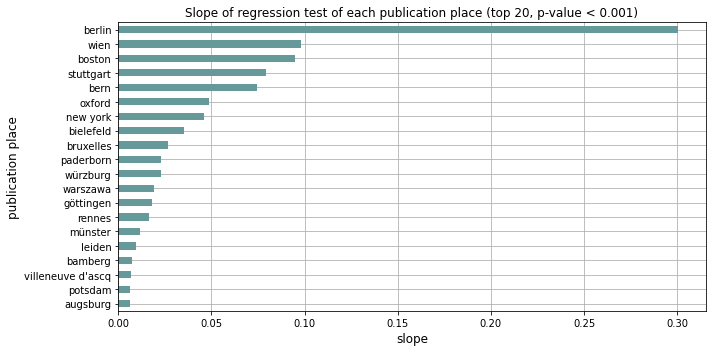

In [53]:
visualize.plot_bars(regression_results_place_df.loc[regression_results_place_df["pvalue"] < 0.001][["slope"]].head(20).T, title ="Slope of regression test of each publication place (top 20, p-value < 0.001)", xlabel ="slope", ylabel = "publication place", figure_name = "figure_09_bar_slop_publication_top_place", figsize=(10,5))

In [54]:
regression_results_place_df.loc[(regression_results_place_df["pvalue"] < 0.001) & (regression_results_place_df["slope"] > 0) ]


column     slope   intercept    rvalue  \
column                                                                 
berlin                        berlin  0.300235 -592.968729  0.817422   
wien                            wien  0.098020 -193.749951  0.907463   
boston                        boston  0.094741 -188.484824  0.613252   
stuttgart                  stuttgart  0.079118 -154.613659  0.781336   
bern                            bern  0.074245 -146.471642  0.885514   
oxford                        oxford  0.048741  -95.940832  0.724282   
new york                    new york  0.046054  -89.833813  0.620837   
bielefeld                  bielefeld  0.035053  -69.697277  0.804112   
bruxelles                  bruxelles  0.026639  -52.102699  0.620989   
paderborn                  paderborn  0.022940  -45.543019  0.623675   
würzburg                    würzburg  0.022769  -45.161350  0.769257   
warszawa                    warszawa  0.019362  -38.549937  0.565884   
göttingen                  göttingen  0.018086  -35.885202  0.781323   
rennes                        rennes  0.016351  -32.465443  0.747665   
münster                      münster  0.011886  -23.425554  0.635869   
leiden                        leiden  0.009363  -18.576523  0.692765   
bamberg                      bamberg  0.007335  -14.553530  0.673879   
villeneuve d'ascq  villeneuve d'ascq  0.006974  -13.812028  0.699273   
potsdam                      potsdam  0.006508  -12.943024  0.600240   
augsburg                    augsburg  0.006072  -12.044139  0.527244   
turnhout                    turnhout  0.006069  -12.053298  0.773559   
vigo                            vigo  0.006039  -11.878269  0.718173   
sevilla                      sevilla  0.006021  -11.802901  0.615447   
woodbridge                woodbridge  0.005799  -11.505118  0.613880   
seelze                        seelze  0.005072  -10.064986  0.521981   
saarbrücken              saarbrücken  0.004657   -9.236498  0.649520   
españa                        españa  0.004503   -8.950688  0.569192   
braunschweig            braunschweig  0.002952   -5.854173  0.557289   
dijon                          dijon  0.002938   -5.802262  0.669343   
alcalá de henares  alcalá de henares  0.002747   -5.416457  0.506464   
córdoba                      córdoba  0.002649   -5.241124  0.522556   
limoges                      limoges  0.002598   -5.140662  0.705164   

                         pvalue    stderr  expectation_2020  expectation_2030  \
column                                                                          
berlin             1.226552e-10  0.034322         13.505433         16.507780   
wien               6.882678e-16  0.007362          4.251087          5.231290   
boston             2.585356e-05  0.019796          2.892585          3.839998   
stuttgart          2.689067e-09  0.010252          5.205161          5.996343   
bern               3.224786e-14  0.006319          3.503804          4.246256   
oxford             1.271494e-07  0.007527          2.516399          3.003811   
new york           1.918805e-05  0.009434          3.194415          3.654951   
bielefeld          4.123500e-10  0.004204          1.109178          1.459705   
bruxelles          1.907224e-05  0.005454          1.707139          1.973525   
paderborn          1.712827e-05  0.004664          0.796008          1.025409   
würzburg           6.658613e-09  0.003068          0.831158          1.058844   
warszawa           1.414898e-04  0.004576          0.561458          0.755079   
göttingen          2.691893e-09  0.002344          0.648612          0.829473   
rennes             2.961863e-08  0.002356          0.562941          0.726448   
münster            1.037890e-05  0.002340          0.584793          0.703657   
leiden             7.291083e-07  0.001581          0.337051          0.430683   
bamberg            1.876402e-06  0.001305          0.263785          0.337138   
villeneuve d'ascq  5.177311e-07  0.001157 

C:\Users\calvotello\Dropbox\MTB\Göttingen\research\librarian_robot\visualize.py:181: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


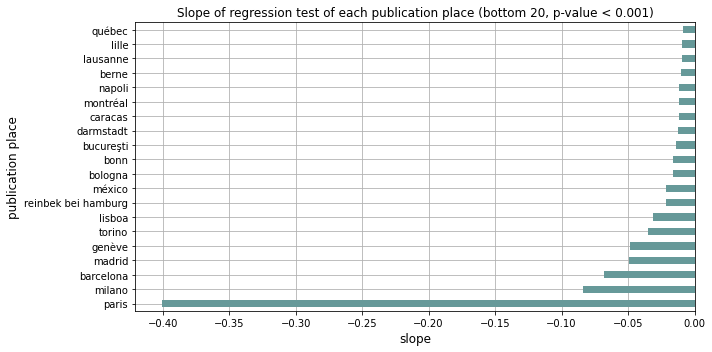

In [55]:
visualize.plot_bars(regression_results_place_df.loc[regression_results_place_df["pvalue"] < 0.001][["slope"]].tail(20).T, title ="Slope of regression test of each publication place (bottom 20, p-value < 0.001)", xlabel ="slope", ylabel = "publication place", figure_name = "figure_10_bar_slop_publication_bottom_place", figsize=(10,5))

In [56]:
regression_results_place_df.loc[(regression_results_place_df["pvalue"] < 0.001) & (regression_results_place_df["slope"] < 0) ].round(2)

column  slope  intercept  rvalue  pvalue  \
column                                                                       
coimbra                          coimbra  -0.00       5.46   -0.60     0.0   
ann arbor                      ann arbor  -0.00       6.68   -0.57     0.0   
princeton                      princeton  -0.00       7.82   -0.67     0.0   
mexico                            mexico  -0.00       7.80   -0.70     0.0   
mich                                mich  -0.00       8.22   -0.69     0.0   
conn                                conn  -0.00       8.73   -0.51     0.0   
berkeley                        berkeley  -0.00       8.71   -0.58     0.0   
padova                            padova  -0.00       9.29   -0.56     0.0   
bogotá                            bogotá  -0.00       9.41   -0.58     0.0   
wuppertal                      wuppertal  -0.01      10.63   -0.56     0.0   
la habana                      la habana  -0.01      12.29   -0.74     0.0   
ottawa                            ottawa  -0.01      13.07   -0.69     0.0   
palermo                          palermo  -0.01      13.35   -0.75     0.0   
rheinfelden                  rheinfelden  -0.01      13.88   -0.66     0.0   
lexington                      lexington  -0.01      14.14   -0.76     0.0   
salamanca                      salamanca  -0.01      15.72   -0.71     0.0   
calif                              calif  -0.01      16.35   -0.77     0.0   
québec                            québec  -0.01      17.84   -0.77     0.0   
lille                              lille  -0.01      18.69   -0.78     0.0   
lausanne                        lausanne  -0.01      19.63   -0.76     0.0   
berne                              berne  -0.01      20.61   -0.72     0.0   
napoli                            napoli  -0.01      23.35   -0.70     0.0   
montréal                        montréal  -0.01      23.32   -0.77     0.0   
caracas                          caracas  -0.01      23.34   -0.78     0.0   
darmstadt                      darmstadt  -0.01      24.77   -0.51     0.0   
bucureşti                      bucureşti  -0.01      27.64   -0.78     0.0   
bonn                                bonn  -0.02      32.75   -0.53     0.0   
bologna                          bologna  -0.02      33.06   -0.71     0.0   
méxico                            méxico  -0.02      43.28   -0.71     0.0   
reinbek bei hamburg  reinbek bei hamburg  -0.02      43.21   -0.76     0.0   
lisboa                            lisboa  -0.03      64.10   -0.76     0.0   
torino                            torino  -0.04      71.55   -0.91     0.0   
genève                            genève  -0.05      98.71   -0.84     0.0   
madrid                            madrid  -0.05     105.20   -0.62     0.0   
barcelona                      barcelona  -0.07     139.00   -0.86     0.0   
milano                            milano  -0.08     170.00   -0.86     0.0   
paris                              paris  -0.40     817.25   -0.96     0.0   

                     stderr  expectation_2020  expectation_2030  \
column                                                            
coimbra                0.00              0.02             -0.01   
ann arbor              0.00             -0.01             -0.04   
princeton              0.00              0.01             -0.03   
mexico                 0.00             -0.01             -0.05   
mich                   0.00             -0.02             -0.06   
conn                   0.00              0.04              0.00   
berkeley               0.00             -0.01             -0.05   
padova                 0.00              0.11              0.06   
bogotá                 0.00              0.03             -0.02   
wuppertal              0.00             -0.03             -0.09   
la habana              0.00             -0.02             -0.08   
ottawa                 0.00             -0.04             -0.10   
palermo                0.00              0.06        

In [57]:
years_place_publication_rel_df

paris     berlin    madrid  frankfurt am main  \
year_publication                                                      
1980              22.894992   3.169610  6.151706           5.619405   
1981              21.494553   3.223546  6.893037           6.338791   
1982              21.787467   2.875598  7.216943           5.564872   
1983              21.948156   3.791253  6.303529           5.127327   
1984              21.167732   3.584229  6.004883           5.880214   
1985              22.915817   4.479209  6.176111           5.814309   
1986              23.488703   3.052386  6.398093           4.903983   
1987              20.755750   4.184922  7.361263           5.576853   
1988              21.287659   3.500972  7.601318           6.743937   
1989              22.269841   4.897339  6.685627           5.586940   
1990              19.812327   3.924078  8.491505           5.939433   
1991              21.532400   3.260427  6.473305           6.283114   
1992              20.563836   4.454711  7.081675           6.349902   
1993              20.633376   4.919043  4.993673           6.080665   
1994              19.842265   4.897136  5.875340           5.801975   
1995              19.550300   5.250582  5.805048           6.120573   
1996              18.910879   4.753554  6.006138           6.287969   
1997              19.414668   5.623841  4.875672           5.686712   
1998              18.598647   5.680199  4.962013           5.784069   
1999              18.080114   6.680973  5.848355           6.838340   
2000              13.072840   6.803213  5.430342           6.936609   
2001              15.661608   6.760344  5.603324           6.416989   
2002              14.007629   6.530031  5.954832           5.948777   
2003              14.538069   7.478431  6.521192           5.900875   
2004              12.706302   7.161165  5.551388           7.561265   
2005              13.081776   6.389120  5.930842           6.100464   
2006              12.284120   6.961297  5.736132           7.176807   
2007              11.490648   6.977265  5.554933           6.837272   
2008              11.442631   8.396661  6.253893           6.478136   
2009              10.766285   8.613688  6.434679           7.590214   
2010              11.561409  11.599492  5.852110           7.019994   
2011               9.931708  21.059300  5.080189           7.017706   
2012              10.856879  19.458640  4.351983           6.649962   
2013              12.305622  12.365431  4.721142           7.498505   
2014              12.428100  12.498608  4.486585           6.278992   
2015              11.327870  11.704982  4.420190           6.149830   
2016               9.079581  10.588354  4.590307           5.873438   
2017               9.949865  10.694177  5.217894           7.601234   
2018               8.322009  11.797406  6.621371           6.139592   
2019               9.980219  13.983610  4.832329           4.347212   

                  stuttgart   münchen  tübingen  barcelona      wien  \
year_publication                                                       
1980               1.977982  4.730220  3.726107   3.853133  1.010162   
1981               1.885711  3.612155  3.956170   3.943429  0.566987   
1982               1.968822  3.533942  3.086765   3.577418  0.335383   
1983               2.723535  3.465799  2.814891   3.717026  0.542423   
1984               2.498572  4.623136  3.817983   3.360864  0.914238   
1985               2.405218  4.601508  2.996331   3.653689  0.815328   
1986               2.273248  5.541042  3.716944   3.478620  0.586645   
1987               3.089631  5.471888  3.491238   3.696605  0.812340   
1988               2.306196  3.921724  3.814552   3.564482  0.821657   
1989               3.093466  3.038922  3.483072   3.568785  0.923365   
1990               2.807990  3.454894  3.860098   3.863653  0.437193   
1991               2.801929  3.684961  3.793642   3.936286  0.821899   
1992               3.220476  3.

In [59]:
1+1

2